In [1]:
## Import statement: pandas is a "package"
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.formula.api as smf


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [3]:
df_income = pd.read_csv("data/models/income.csv")
df_income.head(3)

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727


In [4]:
mod_edu = smf.ols(data = df_income, formula = "Income ~ Education").fit()
mod_edu.params

Intercept   -41.916612
Education     6.387161
dtype: float64

In [6]:
X = 20
-41.92 + 6.39 * X

85.88

In [9]:
mod_edu.predict()


array([95.95797131, 74.81426521, 35.16981627, 66.88537542, 85.38611826,
       74.81426521, 85.38611826, 93.31500804, 88.02908152, 21.95499996,
       45.74166932, 77.45722847, 32.52685301, 64.24241216, 21.95499996,
       88.02908152, 48.38463259, 64.24241216, 64.24241216, 88.02908152,
       74.81426521, 51.02759585, 69.52833868, 24.59796322, 95.95797131,
       29.88388975, 85.38611826, 32.52685301, 35.16981627, 66.88537542])

In [14]:
new_data = pd.DataFrame({'Education': [10, 25, 35]})
mod_edu.predict(new_data)

0     21.955000
1    117.762418
2    181.634030
dtype: float64

In [16]:
new_data['Education'] * 6.39 - 41.92

0     21.98
1    117.83
2    181.73
Name: Education, dtype: float64

Text(0, 0.5, 'Real values: $Y$')

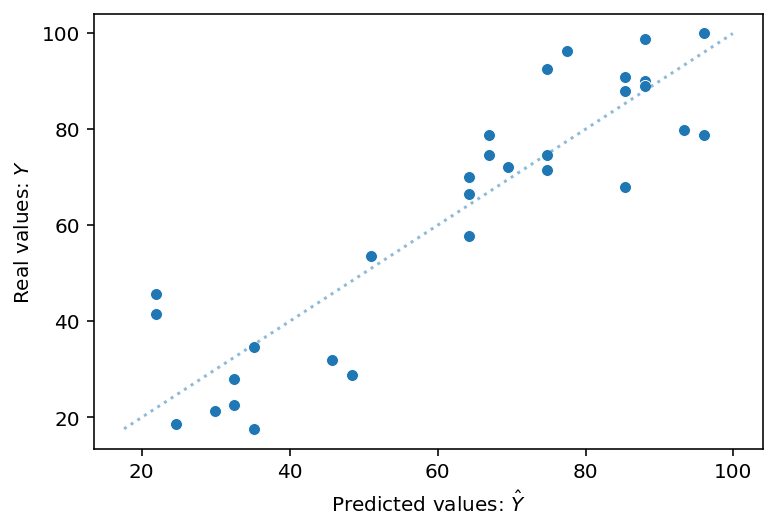

In [19]:
y_pred = mod_edu.predict()
sns.scatterplot(x = y_pred, y = df_income['Income'])
sns.lineplot(x = df_income['Income'], y = df_income['Income'], alpha = .5, linestyle = "dotted")
plt.xlabel("Predicted values: $\hat{Y}$")
plt.ylabel("Real values: $Y$")

Text(0, 0.5, 'Residuals')

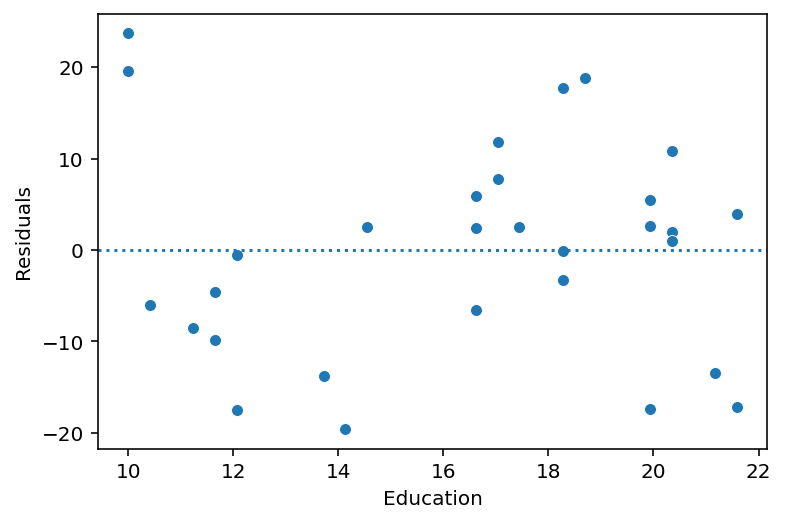

In [21]:
sns.scatterplot(x = df_income['Education'], y = mod_edu.resid)
plt.axhline(y = 0, linestyle = "dotted")
plt.ylabel("Residuals")

In [23]:
mod_seniority = smf.ols(data = df_income, formula = "Income ~ Seniority").fit()
mod_seniority.params

Intercept    39.158326
Seniority     0.251288
dtype: float64

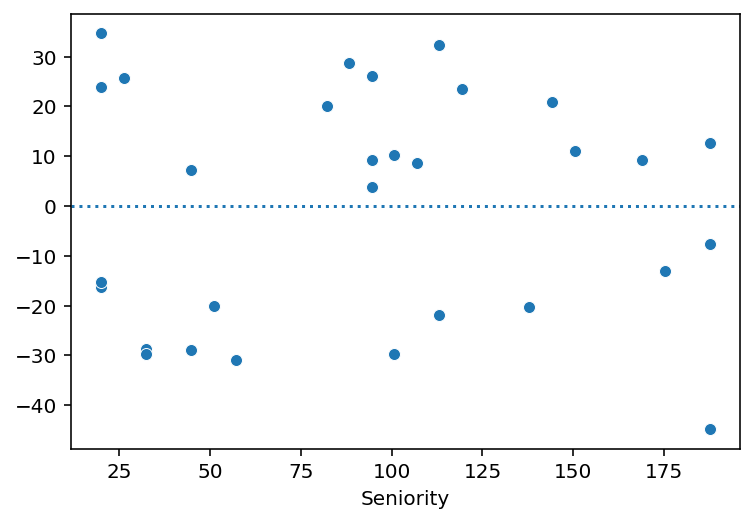

In [27]:
# y_pred = mod_seniority.predict()
sns.scatterplot(x = df_income['Seniority'], y = mod_seniority.resid)
plt.axhline(y = 0, linestyle = "dotted")

In [28]:
### define a helper function!
def rss(y_pred, y):
    return sum((y_pred - y)**2)

In [29]:
## RSS for "Education" model
rss(mod_edu.predict(), df_income['Income'])

3982.5065854722675

In [30]:
## RSS for "Education" model
rss(mod_seniority.predict(), df_income['Income'])

15477.269661883036

In [31]:
### define a helper function!
def mse(y_pred, y):
    return (sum((y_pred - y)**2)) / (len(y))

In [32]:
## RSS for "Education" model
mse(mod_edu.predict(), df_income['Income'])

132.75021951574226

In [33]:
## RSS for "Education" model
mse(mod_seniority.predict(), df_income['Income'])

515.9089887294346

In [34]:
np.sqrt(mod_edu.scale) ## standard error of the estimate

11.926121668530007

In [35]:
np.sqrt(mod_seniority.scale)

23.510840707672212